<a href="https://colab.research.google.com/github/ginttone/multi_deeplearning/blob/master/Naver_shopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 네이버 쇼핑몰 리뷰데이터

## 데이터 가져오기

In [1]:
!python -m pip install konlpy

     |████████████████████████████████| 19.4 MB 100 kB/s 
     |████████████████████████████████| 86 kB 2.4 MB/s 
     |████████████████████████████████| 448 kB 38.1 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


오픈 api 사용할 때 쓰는 것 : curl

In [2]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  15439      0 --:--:-- --:--:-- --:--:-- 15439


리눅스 파일 확장자 : .sh(shell)


In [3]:
!bash ./mecab.sh

Installing automake (A dependency for mecab-ko)
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [62.9 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:12 https://developer.download.nvidia.com/compute/cuda/repos/

In [4]:
!curl -O https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.6M  100 19.6M    0     0  10.1M      0  0:00:01  0:00:01 --:--:-- 10.1M


## 다운받은 데이터 판다스로 불러오기

In [5]:
import pandas as pd

In [6]:
total_data = pd.read_table('./naver_shopping.txt', names=['ratings','reviews'])

In [7]:
total_data.head(10)

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...


In [8]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ratings  200000 non-null  int64 
 1   reviews  200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


### [Drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)(동일하게) 되있는 부분을 없애기

```
 0   ratings  200000 non-null  int64 
 1   reviews  200000 non-null  object
 ```
 와 

 len(total_data) 199908 
 
 비교해보니 다른게 있는 것을 알 수 있었다. 

In [9]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)
len(total_data)

199908

### split

In [10]:
from sklearn.model_selection import train_test_split

전처리

In [11]:
x_data = total_data['reviews']
y_data = total_data['ratings']

In [12]:
x_train ,x_test,y_train, y_test = train_test_split(x_data,y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((149931,), (149931,), (49977,), (49977,))

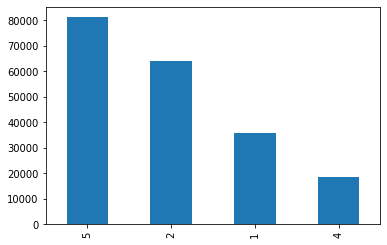

In [13]:
y_data.value_counts().plot(kind='bar')

데이터가 쏠려있을 때 평준화 시켜줘야 한다

(많은건 삭제:과소표집, 적은건 증가 시킴:과대표집)

[SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)



In [14]:
type(x_train), x_train

(pandas.core.series.Series,
 194182                                         애기가 짱짱하고 좋네요
 108634    굳굳 늘 쓰던 거라 좋네용또 구매했구요또 구매하러오곘습니다가격도 좋아요 ㅇㅇㄴㄱㅇㄹ...
 182291                            배송도 오래걸렷고, 생각보다 너무 오버핏이예요
 141043                단한번도쓰지않았습니다 너무부실해서조금더괜찮은걸로구매하는걸추천드립니다
 40277                                색상이 너무 촌스러워요 받고 깜짝놀랬어요
                                 ...                        
 159147          아는분이 추천해주셔서 구입했는데 정말 촉촉하고 환해지는느낌이 들어요 만족합니다
 83671                                        잘먹었어요 다음에또시킬게요
 121973      배송 일주일만에 왔으며. 제품도 그닥인듯하나. 조립한시간이 아까워서 그냥 씁니다...
 62367                       재구매 한두개씩 불량이 있습니다 귀찮아서 그냥 사용합니다
 170213                     옵션명을 헷갈리게해놔서 이상한 제품이 왓네요.. 그냥씁니다
 Name: reviews, Length: 149931, dtype: object)

## NLP : 테스트 전처리

[regular expression](https://regexr.com/)불용어 처리 간단히 하는 방법

한글만 가져올 때 

가나다 순으로 [가-힣] 모두 가져올 수 있음 

가나다 순으로 [가-두] 사이는 모두 가져올 수 있음

[가-힣ㄱ-ㅎㅠ ]이런식으로 추가해서 가져오면 됨

한글과 영어 같이 가져올때 [가-두a-l]


In [15]:
from konlpy.tag import Mecab

In [16]:
mecab = Mecab()

In [17]:
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는게 나을 것 같다.'))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '것', '같', '다', '.']


In [22]:
x_train_small = x_train[0:5000]

In [40]:
sentance = list()
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

for tok in x_train_small:
  encoded = mecab.morphs(tok)

  sentance.append([item for item in encoded if item not in stopwords])

## sentance   

## Tokenizer

In [30]:
import tensorflow as tf

In [31]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [32]:
tokenizer.fit_on_texts(sentance)

In [ ]:
 tokenizer.word_index

우리가 만든 사전의 단어가 전체문장에 몇번 들어갔는지 카운팅 되어 나옴

In [ ]:
 tokenizer.word_counts

전체카운팅에서 낮은 애들 걸러내기

카운트 2이하인 것들만 뽑아내서 전체에서 빼면 총 몇퍼센트 인지 확인가능하다

In [37]:
total_cnt = len(tokenizer.word_index)

In [45]:
rare_cnt = 0
total_freq,rare_freq = 0,0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value #전체 단어의 수
  if(value <=2):
    rare_cnt = rare_cnt+ 1  
    rare_freq = rare_freq + value #2미만인 단어(희귀단어)의 수

In [46]:
total_cnt, rare_cnt, (rare_cnt/total_cnt)*100, (rare_freq/total_freq)*100

(7994, 5247, 65.63672754565924, 7.654031553891606)

In [48]:
vocab_size = total_cnt - rare_cnt #보케블러리 사이즈

oov(Out Of Vocablary)

In [50]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')

In [54]:
tokenizer.fit_on_texts(sentance)

In [ ]:
 tokenizer.index_word

## 숫자화

텍스트 시퀀스 

In [60]:
x_train_small = tokenizer.texts_to_sequences(sentance)

In [68]:
len(x_train_small[0]),len(x_train_small[40]),len(x_train_small[50])

(4, 16, 37)

평균적인 사이즈 확인

In [70]:
hist_len = [len(words) for words in x_train_small]

In [71]:
import matplotlib.pyplot as plt

(array([ 21.,  72., 445., 327., 347., 611., 234., 217., 373., 173., 136.,
        249., 120., 108., 190.,  91.,  91., 176.,  74.,  65., 131.,  66.,
         51.,  83.,  51.,  41.,  65.,  39.,  23.,  62.,  23.,  21.,  45.,
         15.,  15.,  33.,  25.,  12.,  24.,   6.,   6.,  17.,   7.,   3.,
          8.,   1.,   2.,   3.,   0.,   2.]),
 array([ 1.  ,  2.34,  3.68,  5.02,  6.36,  7.7 ,  9.04, 10.38, 11.72,
        13.06, 14.4 , 15.74, 17.08, 18.42, 19.76, 21.1 , 22.44, 23.78,
        25.12, 26.46, 27.8 , 29.14, 30.48, 31.82, 33.16, 34.5 , 35.84,
        37.18, 38.52, 39.86, 41.2 , 42.54, 43.88, 45.22, 46.56, 47.9 ,
        49.24, 50.58, 51.92, 53.26, 54.6 , 55.94, 57.28, 58.62, 59.96,
        61.3 , 62.64, 63.98, 65.32, 66.66, 68.  ]),
 <a list of 50 Patch objects>)

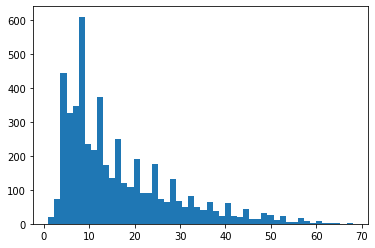

In [74]:
plt.hist(hist_len, bins=50)

pad를 몇정도 하면 좋을지 확인

In [78]:
sum(hist_len)/ len(x_train_small)

16.7206

50정도로 pad채워주기로함

In [79]:
x_train_small =tf.keras.preprocessing.sequence.pad_sequences(x_train_small, maxlen=50)

In [80]:
x_train_small

array([[   0,    0,    0, ...,  837,    4,    3],
       [   0,    0,    0, ...,    4,    8,    1],
       [   0,    0,    0, ..., 2287,  661,  250],
       ...,
       [   0,    0,    0, ..., 1137,    1,   63],
       [   0,    0,    0, ..., 1210,   31,    8],
       [   0,    0,    0, ...,    4,   38,   55]], dtype=int32)

In [85]:
y_train_small = y_train[0:5000]

In [86]:
import numpy as np

np.unique(y_train_small) # 의견은 데이터 기준이어서 3이빠졋으니 덴스 5개

array([1, 2, 4, 5])

## Model

In [81]:
model = tf.keras.models.Sequential()

In [87]:
model.add(tf.keras.layers.Embedding(input_dim=vocab_size,output_dim =30 ,input_length=50))
# model.add(tf.keras.layers.LSTM(128))의 성능 높여주기
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))
model.add(tf.keras.layers.Dense(5,activation='softmax'))

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['acc'])

In [91]:
hist = model.fit(x_train_small, y_train_small, epochs=3, batch_size=256, validation_split=0.3)

Epoch 1/3


InvalidArgumentError: ignored